### 1. 개발 환경 세팅

In [ ]:
### 개발환경 세팅하기

# ▶ 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# ▶ 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 폰트 설정
plt.figure(figsize=(20, 15))
plt.rc('font', family='NanumBarunGothic')
# plt.rcParams['font.family'] = 'AppleGothic'

# 한글 폰트 사용 시 마이너스 깨짐 현상 방지
plt.rcParams['axes.unicode_minus'] = False

<Figure size 2000x1500 with 0 Axes>

In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 2. 전처리된 데이터 확인

In [ ]:
import os
print(os.listdir('/content/'))

['.config', 'drive', 'tour_accessibility.xlsx', 'sample_data']


In [ ]:
seoul_tour_info = pd.read_excel('./tour_accessibility.xlsx')
seoul_tour_info

,tour_name,nearest_bus_stop,bus_distance,tour_category
0,석굴야영장,도봉산입구,2160.964323,야영장
1,구조대9야영장,도봉산입구,2130.402083,야영장
2,과해주말농장,한국공항공사,1962.761453,관광농원/허브마을
3,우이동계곡,우이동,1781.203744,폭포/계곡
4,미소석가불,신성빌라,1761.877098,비/탑/문/각
...,...,...,...,...
1186,석촌호수카페거리,호수임광아파트,7.869812,먹거리/패션거리
1187,서울성곽순례길,자하문고개.윤동주문학관,6.999318,일반관광지
1188,서초서리풀페스티벌,서초역2번출구,5.906504,지역축제
1189,송강길,경복고교,4.546687,일반관광지


In [ ]:
seoul_tour_info.describe()

,bus_distance
count,1191.000000
mean,168.232261
std,206.115053
min,2.830847
25%,70.271521
50%,117.435762
75%,181.866626
max,2160.964323


In [ ]:
seoul_tour_info.sort_values(by='bus_distance', ascending=False)

,tour_name,nearest_bus_stop,bus_distance,tour_category
0,석굴야영장,도봉산입구,2160.964323,야영장
1,구조대9야영장,도봉산입구,2130.402083,야영장
2,과해주말농장,한국공항공사,1962.761453,관광농원/허브마을
3,우이동계곡,우이동,1781.203744,폭포/계곡
4,미소석가불,신성빌라,1761.877098,비/탑/문/각
...,...,...,...,...
1186,석촌호수카페거리,호수임광아파트,7.869812,먹거리/패션거리
1187,서울성곽순례길,자하문고개.윤동주문학관,6.999318,일반관광지
1188,서초서리풀페스티벌,서초역2번출구,5.906504,지역축제
1189,송강길,경복고교,4.546687,일반관광지


In [ ]:
seoul_tour_info['tour_category'].unique()

array(['야영장', '관광농원/허브마을', '폭포/계곡', '비/탑/문/각', '테마공원/대형놀이공원', '유명사적/유적지',
       '휴양림/수목원', '일반관광지', '서원/향교/서당', '먹거리/패션거리', '지역축제', '캠핑장',
       '드라마/영화촬영지', '왕릉/고분', '팜스테이', '궁궐/종묘', '고택/생가/민속마을', '아쿠아리움/대형수족관'],
      dtype=object)

In [ ]:
seoul_tour_info['tour_category'].value_counts()

,count
tour_category,
지역축제,341
먹거리/패션거리,261
일반관광지,154
팜스테이,109
유명사적/유적지,73
휴양림/수목원,72
비/탑/문/각,37
캠핑장,25
서원/향교/서당,22


In [ ]:
# 'tour_theme' 컬럼 추가
def assign_theme(category):
    if category in ['드라마/영화촬영지', '일반관광지', '먹거리/패션거리']:
        return 'general_tour'
    elif category in ['테마공원/대형놀이공원', '아쿠아리움/대형수족관']:
        return 'family_tour'
    elif category in ['야영장', '관광농원/허브마을', '폭포/계곡', '캠핑장', '휴양림/수목원']:
        return 'nature_tour'
    elif category in ['지역축제', '팜스테이']:
        return 'local_tour'
    elif category in ['비/탑/문/각', '유명사적/유적지', '서원/향교/서당', '왕릉/고분', '궁궐/종묘', '고택/생가/민속마을']:
        return 'history_tour'
    else:
        return 'else'

# 'tour_theme' 컬럼 적용
seoul_tour_info['tour_theme'] = seoul_tour_info['tour_category'].apply(assign_theme)

# 결과 확인
print(seoul_tour_info[['tour_category', 'tour_theme']].head())


  tour_category    tour_theme
0           야영장   nature_tour
1           야영장   nature_tour
2     관광농원/허브마을   nature_tour
3         폭포/계곡   nature_tour
4       비/탑/문/각  history_tour


In [ ]:
seoul_tour_info

,tour_name,nearest_bus_stop,bus_distance,tour_category,tour_theme
0,석굴야영장,도봉산입구,2160.964323,야영장,nature_tour
1,구조대9야영장,도봉산입구,2130.402083,야영장,nature_tour
2,과해주말농장,한국공항공사,1962.761453,관광농원/허브마을,nature_tour
3,우이동계곡,우이동,1781.203744,폭포/계곡,nature_tour
4,미소석가불,신성빌라,1761.877098,비/탑/문/각,history_tour
...,...,...,...,...,...
1186,석촌호수카페거리,호수임광아파트,7.869812,먹거리/패션거리,general_tour
1187,서울성곽순례길,자하문고개.윤동주문학관,6.999318,일반관광지,general_tour
1188,서초서리풀페스티벌,서초역2번출구,5.906504,지역축제,local_tour
1189,송강길,경복고교,4.546687,일반관광지,general_tour


In [ ]:
seoul_tour_info['tour_theme'].value_counts()

,count
tour_theme,
local_tour,450
general_tour,422
history_tour,173
family_tour,88
nature_tour,58


In [ ]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 테마별 기술통계량
theme_summary = seoul_tour_info.groupby('tour_theme')['bus_distance'].describe()
print(theme_summary)

# ANOVA 테스트 수행
# 각 테마에 해당하는 bus_distance 데이터 추출
groups = [group['bus_distance'].dropna() for _, group in seoul_tour_info.groupby('tour_theme')]

# F-통계량과 p-value 계산
f_stat, p_value = stats.f_oneway(*groups)
print(f"ANOVA 결과: F-통계량 = {f_stat}, p-value = {p_value}")

# 사후 분석 (Tukey HSD)
tukey = pairwise_tukeyhsd(endog=seoul_tour_info['bus_distance'],
                          groups=seoul_tour_info['tour_theme'],
                          alpha=0.05)
print(tukey)


              count        mean         std        min         25%  \
tour_theme                                                           
family_tour    88.0  249.214442  245.198359  32.588861  117.279764   
general_tour  422.0  124.446290  122.573998   2.830847   58.351327   
history_tour  173.0  215.578420  260.279923  11.689917   77.682493   
local_tour    450.0  141.544371  109.610602   5.906504   73.493007   
nature_tour    58.0  429.782468  527.995599  29.022364  121.577807   

                     50%         75%          max  
tour_theme                                         
family_tour   179.332584  273.696999  1733.097714  
general_tour   96.640817  147.656612  1116.739487  
history_tour  137.805832  255.523699  1761.877098  
local_tour    115.028424  166.207668   683.418034  
nature_tour   213.618128  461.798063  2160.964323  
ANOVA 결과: F-통계량 = 40.398162125329335, p-value = 9.160808666320178e-32
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   gro

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# 결측값 처리
seoul_tour_info['bus_distance'] = pd.to_numeric(seoul_tour_info['bus_distance'], errors='coerce')
seoul_tour_info = seoul_tour_info.dropna(subset=['bus_distance'])

# tour_theme을 범주형으로 설정
seoul_tour_info['tour_theme'] = seoul_tour_info['tour_theme'].astype('category')

# 더미 변수 생성
data = pd.get_dummies(seoul_tour_info, columns=['tour_theme'])

# 기준 변수(history_tour) 제거
data = data.drop(columns=['tour_theme_history_tour'])

# 독립 변수(X)와 종속 변수(y) 설정
X = data[[col for col in data.columns if col.startswith('tour_theme_')]]
X = sm.add_constant(X)  # 상수항 추가
y = data['bus_distance']

# 변수 이름 설정
feature_names = ['const'] + list(X.columns[1:])  # 상수항 추가 후 변수 이름 설정

# 명시적 변환
X = np.asarray(X, dtype=float)
y = np.asarray(y, dtype=float)

# 회귀 분석 모델 실행
model = sm.OLS(y, X).fit()


print(model.summary(xname=feature_names))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     40.40
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           9.16e-32
Time:                        01:47:03   Log-Likelihood:                -7959.6
No. Observations:                1191   AIC:                         1.593e+04
Df Residuals:                    1186   BIC:                         1.595e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
seoul_tour_info

,tour_name,nearest_bus_stop,bus_distance,tour_category,tour_theme
0,석굴야영장,도봉산입구,2160.964323,야영장,nature_tour
1,구조대9야영장,도봉산입구,2130.402083,야영장,nature_tour
2,과해주말농장,한국공항공사,1962.761453,관광농원/허브마을,nature_tour
3,우이동계곡,우이동,1781.203744,폭포/계곡,nature_tour
4,미소석가불,신성빌라,1761.877098,비/탑/문/각,history_tour
...,...,...,...,...,...
1186,석촌호수카페거리,호수임광아파트,7.869812,먹거리/패션거리,general_tour
1187,서울성곽순례길,자하문고개.윤동주문학관,6.999318,일반관광지,general_tour
1188,서초서리풀페스티벌,서초역2번출구,5.906504,지역축제,local_tour
1189,송강길,경복고교,4.546687,일반관광지,general_tour


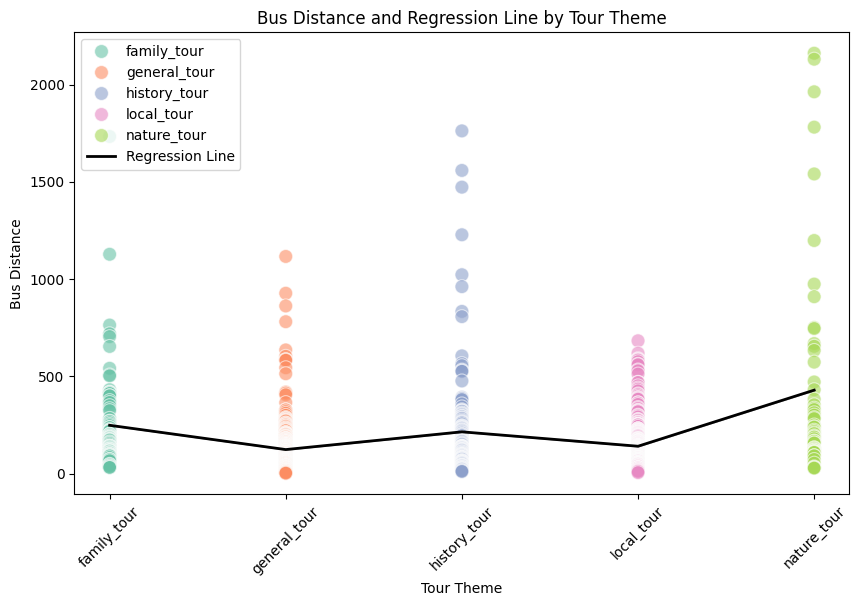

In [ ]:
seoul_tour_info['predicted_bus_distance'] = model.predict(X)

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=seoul_tour_info, x='tour_theme', y='bus_distance', hue='tour_theme', palette='Set2', s=100, alpha=0.6)
sns.lineplot(data=seoul_tour_info, x='tour_theme', y='predicted_bus_distance', color='black', linewidth=2, label='Regression Line')

plt.title('Bus Distance and Regression Line by Tour Theme')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.xlabel('Tour Theme')
plt.ylabel('Bus Distance')
plt.legend()
plt.show()

In [ ]:
# 'bus_distance'가 1000m 이상이고 'tour_theme'이 'nature_tour'인 행을 필터링
filtered_data = seoul_tour_info[(seoul_tour_info['bus_distance'] >= 1000) & (seoul_tour_info['tour_theme'] == 'nature_tour')]

# 필터링된 데이터를 출력
print(filtered_data)


   tour_name nearest_bus_stop  bus_distance tour_category   tour_theme  \
0      석굴야영장            도봉산입구   2160.964323           야영장  nature_tour   
1    구조대9야영장            도봉산입구   2130.402083           야영장  nature_tour   
2     과해주말농장           한국공항공사   1962.761453     관광농원/허브마을  nature_tour   
3      우이동계곡              우이동   1781.203744         폭포/계곡  nature_tour   
7      삼천사계곡    하나고.삼천사.진관사입구   1540.636822         폭포/계곡  nature_tour   
10     진관사계곡    하나고.삼천사.진관사입구   1198.683846         폭포/계곡  nature_tour   

    predicted_bus_distance  
0               429.782468  
1               429.782468  
2               429.782468  
3               429.782468  
7               429.782468  
10              429.782468  


In [ ]:
import os
print(os.listdir('/content/'))

['.config', 'tour_coords_seoul.xlsx', 'drive', 'seoul_tour_info.xlsx', '국내_지역별_관광명소데이터.csv', 'tour_accessibility.xlsx', '서울시_정류장마스터_정보.csv', '.ipynb_checkpoints', 'sample_data']


In [ ]:
import pandas as pd

# 버스 정류장 위도, 경도 정보 읽기
bus_stop_coords = pd.read_csv('서울시_정류장마스터_정보.csv', encoding = 'cp949')

# 관광지 위도, 경도 정보 읽기
tour_coords = pd.read_excel('tour_coords_seoul.xlsx')

# 각 데이터프레임의 컬럼 확인
print(bus_stop_coords.columns)  # 버스 정류장 CSV 파일의 컬럼명 확인
print(tour_coords.columns)  # 관광지 CSV 파일의 컬럼명 확인

Index(['정류장_ID', '정류장_명칭', '정류장_유형', '정류장_번호', '위도', '경도', '버스도착정보안내기_설치_여부'], dtype='object')
Index(['tour_name', '위도', '경도'], dtype='object')


In [ ]:
# 관광지 위도와 경도 데이터 병합
tour_coords_unique = tour_coords[['tour_name', '위도', '경도']].drop_duplicates()  # 중복 제거
seoul_tour_info = seoul_tour_info.merge(
    tour_coords_unique.rename(columns={'위도': 'tour_la', '경도': 'tour_lo'}),
    on='tour_name',
    how='left'
)

# 버스 정류장 위도와 경도 데이터 병합
bus_stop_coords_unique = bus_stop_coords[['정류장_명칭', '위도', '경도']].drop_duplicates()  # 중복 제거
seoul_tour_info = seoul_tour_info.merge(
    bus_stop_coords_unique.rename(columns={'위도': 'bus_la', '경도': 'bus_lo'}),
    left_on='nearest_bus_stop',
    right_on='정류장_명칭',
    how='left'
)

# 병합 결과 확인
print(f"병합 후 데이터프레임 행 개수: {len(seoul_tour_info)}")


병합 후 데이터프레임 행 개수: 2260


In [ ]:
seoul_tour_info = seoul_tour_info.drop_duplicates(subset = 'tour_name')

In [ ]:
seoul_tour_info

,tour_name,nearest_bus_stop,bus_distance,tour_category,tour_theme,predicted_bus_distance,tour_la,tour_lo,정류장_명칭,bus_la,bus_lo
0,석굴야영장,도봉산입구,2160.964323,야영장,nature_tour,429.782468,37.696383,127.019070,도봉산입구,37.687083,127.040718
2,구조대9야영장,도봉산입구,2130.402083,야영장,nature_tour,429.782468,37.695833,127.019103,도봉산입구,37.687083,127.040718
4,과해주말농장,한국공항공사,1962.761453,관광농원/허브마을,nature_tour,429.782468,37.555950,126.778139,한국공항공사,37.562433,126.798872
6,우이동계곡,우이동,1781.203744,폭포/계곡,nature_tour,429.782468,37.676834,127.001186,우이동,37.663431,127.012290
7,미소석가불,신성빌라,1761.877098,비/탑/문/각,history_tour,215.578420,37.655542,126.990223,신성빌라,37.643503,127.003531
...,...,...,...,...,...,...,...,...,...,...,...
2244,경리단길,디지텍고등학교앞,7.938753,일반관광지,general_tour,124.446290,37.539744,126.991677,디지텍고등학교앞,37.539803,126.991626
2246,석촌호수카페거리,호수임광아파트,7.869812,먹거리/패션거리,general_tour,124.446290,37.510584,127.106654,호수임광아파트,37.511388,127.107203
2256,서초서리풀페스티벌,서초역2번출구,5.906504,지역축제,local_tour,141.544371,37.491250,127.008173,서초역2번출구,37.491299,127.008147
2257,송강길,경복고교,4.546687,일반관광지,general_tour,124.446290,37.585103,126.971392,경복고교,37.585160,126.970880


In [ ]:
# 결과 확인
print(seoul_tour_info.head())


  tour_name nearest_bus_stop  bus_distance tour_category    tour_theme  \
0     석굴야영장            도봉산입구   2160.964323           야영장   nature_tour   
2   구조대9야영장            도봉산입구   2130.402083           야영장   nature_tour   
4    과해주말농장           한국공항공사   1962.761453     관광농원/허브마을   nature_tour   
6     우이동계곡              우이동   1781.203744         폭포/계곡   nature_tour   
7     미소석가불             신성빌라   1761.877098       비/탑/문/각  history_tour   

   predicted_bus_distance    tour_la     tour_lo  정류장_명칭     bus_la  \
0              429.782468  37.696383  127.019070   도봉산입구  37.687083   
2              429.782468  37.695833  127.019103   도봉산입구  37.687083   
4              429.782468  37.555950  126.778139  한국공항공사  37.562433   
6              429.782468  37.676834  127.001186     우이동  37.663431   
7              215.578420  37.655542  126.990223    신성빌라  37.643503   

       bus_lo  
0  127.040718  
2  127.040718  
4  126.798872  
6  127.012290  
7  127.003531  


In [ ]:
# EXCEL 파일로 저장
seoul_tour_info.to_excel('seoul_tour_info.xlsx', index=False)

print("excel 파일이 저장되었습니다.")

excel 파일이 저장되었습니다.


In [ ]:
# 'tour_name'에 '안양천'이 포함된 행 필터링
anyangcheon_rows = seoul_tour_info[seoul_tour_info['tour_name'].str.contains('안양천', na=False)]

# 결과 출력
print(anyangcheon_rows)


        tour_name  nearest_bus_stop  bus_distance tour_category    tour_theme  \
1881  서울둘레길6코스안양천  가양역4번출구.가양8단지아파트     54.388458         일반관광지  general_tour   

      predicted_bus_distance    tour_la     tour_lo            정류장_명칭  \
1881               124.44629  37.561535  126.855453  가양역4번출구.가양8단지아파트   

         bus_la      bus_lo  
1881  37.561862  126.855912  


In [ ]:
# 'tour_name'에 '안양천'이 포함된 행 필터링
anyangcheon = tour_coords[tour_coords['tour_name'].str.contains('안양천', na=False)]

# 결과 출력
print(anyangcheon)


       tour_name         위도          경도
736  서울둘레길6코스안양천  37.561535  126.855453


In [ ]:
# 'CTPRVN_NM' 열에서 '서울'을 포함하는 행만 필터링
tour_coords = tour_coords[tour_coords['CTPRVN_NM'].str.contains('서울', na=False)]

# 결과 확인
print(tour_coords)


                        ID LCLAS_NM MLSFC_NM    POI_ID tour_name BHF_NM  \
2      KCLANPO23N000000003       장소      관광지    142394     우정여행사    NaN   
3      KCLANPO23N000000004       장소      관광지    145432   비산항공여행사    NaN   
6      KCLANPO23N000000007       장소      관광지    157191   유타항공여행사    NaN   
9      KCLANPO23N000000010       장소      관광지    167131    미르탑항공사    NaN   
11     KCLANPO23N000000012       장소      관광지    170115      문화관광    NaN   
...                    ...      ...      ...       ...       ...    ...   
51442  KCLANPO23N000051443       장소      관광지  23408365   한아국제여행사    NaN   
51450  KCLANPO23N000051451       장소      관광지  23409202      스마트락    NaN   
51455  KCLANPO23N000051456       장소      관광지  23409470     강호여행사    NaN   
51458  KCLANPO23N000051459       장소      관광지  23410017      바카티오    NaN   
51477  KCLANPO23N000051478       장소      관광지  23412512    관악별빛산책    NaN   

       ASSTN_NM  CL_CD    CL_NM                  PNU  ...    RDNMADR_CD  \
2           NaN  60403  

In [ ]:
# 항공사/여행사 위치는 관광지랑 관련이 적어서 제외
tour_coords = tour_coords[tour_coords['CL_NM'] != '항공사/여행사']
tour_coords

,ID,LCLAS_NM,MLSFC_NM,POI_ID,tour_name,BHF_NM,ASSTN_NM,CL_CD,CL_NM,PNU,...,RDNMADR_CD,RDNMADR_NM,BULD_NO,경도,위도,GID_CD,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
28,KCLANPO23N000000029,장소,관광지,222649,삼청동길,NaN,NaN,60513,일반관광지,1111014000100180003,...,NaN,NaN,NaN,126.981658,37.587755,다사542543,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
59,KCLANPO23N000000060,장소,관광지,348188,서울영어마을,수유캠프,NaN,60522,영어마을,1130510300105220000,...,1.130531e+11,삼각산로,43,127.008515,37.639904,다사566601,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
66,KCLANPO23N000000067,장소,관광지,511309,어린이대공원매표소,NaN,NaN,60401,관광안내소/매표소,1121510200100180000,...,1.121531e+11,능동로,216,127.083936,37.551306,다사632503,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
67,KCLANPO23N000000068,장소,관광지,511316,연세대학교신촌캠퍼스매표소,NaN,NaN,60401,관광안내소/매표소,1141011400101340000,...,1.141031e+11,연세로,50-1,126.941825,37.563999,다사507517,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
69,KCLANPO23N000000070,장소,관광지,539117,향나무,NaN,NaN,60600,N,1111013000100020071,...,1.111031e+11,율곡로,99,126.989473,37.579318,다사549534,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,KCLANPO23N000051291,장소,관광지,23391308,누옥,NaN,NaN,60518,팜스테이,1111010900101590014,...,1.111041e+11,필운대로5다길,19,126.965936,37.579542,다사528534,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
51313,KCLANPO23N000051314,장소,관광지,23394275,무월관,NaN,NaN,60518,팜스테이,1111014100101750021,...,1.111041e+11,윤보선길,19-16,126.983597,37.577241,다사544532,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
51333,KCLANPO23N000051334,장소,관광지,23396727,클래식고택,북촌,NaN,60518,팜스테이,1111014600101920000,...,1.111041e+11,북촌로6길,13-2,126.985648,37.580387,다사545535,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
51450,KCLANPO23N000051451,장소,관광지,23409202,스마트락,NaN,NaN,60520,캠핑장,1153010200101970010,...,1.153041e+11,디지털로33길,55,126.893040,37.486756,다사463432,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220


In [ ]:
# 항공사/여행사 위치는 관광지랑 관련이 적어서 제외
tour_coords = tour_coords[tour_coords['CL_NM'] != '관광안내소/매표소']
tour_coords

,ID,LCLAS_NM,MLSFC_NM,POI_ID,tour_name,BHF_NM,ASSTN_NM,CL_CD,CL_NM,PNU,...,RDNMADR_CD,RDNMADR_NM,BULD_NO,경도,위도,GID_CD,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
28,KCLANPO23N000000029,장소,관광지,222649,삼청동길,NaN,NaN,60513,일반관광지,1111014000100180003,...,NaN,NaN,NaN,126.981658,37.587755,다사542543,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
59,KCLANPO23N000000060,장소,관광지,348188,서울영어마을,수유캠프,NaN,60522,영어마을,1130510300105220000,...,1.130531e+11,삼각산로,43,127.008515,37.639904,다사566601,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
69,KCLANPO23N000000070,장소,관광지,539117,향나무,NaN,NaN,60600,N,1111013000100020071,...,1.111031e+11,율곡로,99,126.989473,37.579318,다사549534,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
122,KCLANPO23N000000123,장소,관광지,1239294,남산공원남산케이블카,NaN,NaN,60514,유명관광지,1114012100200010019,...,1.114031e+11,소파로,83,126.983974,37.556648,다사544509,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
136,KCLANPO23N000000137,장소,관광지,4904941,신당동떡볶이골목,NaN,NaN,60517,먹거리/패션거리,1114016200102330088,...,NaN,NaN,NaN,127.015048,37.563323,다사571516,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,KCLANPO23N000051291,장소,관광지,23391308,누옥,NaN,NaN,60518,팜스테이,1111010900101590014,...,1.111041e+11,필운대로5다길,19,126.965936,37.579542,다사528534,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
51313,KCLANPO23N000051314,장소,관광지,23394275,무월관,NaN,NaN,60518,팜스테이,1111014100101750021,...,1.111041e+11,윤보선길,19-16,126.983597,37.577241,다사544532,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
51333,KCLANPO23N000051334,장소,관광지,23396727,클래식고택,북촌,NaN,60518,팜스테이,1111014600101920000,...,1.111041e+11,북촌로6길,13-2,126.985648,37.580387,다사545535,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
51450,KCLANPO23N000051451,장소,관광지,23409202,스마트락,NaN,NaN,60520,캠핑장,1153010200101970010,...,1.153041e+11,디지털로33길,55,126.893040,37.486756,다사463432,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220


In [ ]:
# 필요한 컬럼만 선택
tour_coords_seoul = tour_coords[['tour_name', '위도', '경도']]

# 결과 확인
print(tour_coords_seoul)


        tour_name         위도          경도
28           삼청동길  37.587755  126.981658
59         서울영어마을  37.639904  127.008515
69            향나무  37.579318  126.989473
122    남산공원남산케이블카  37.556648  126.983974
136      신당동떡볶이골목  37.563323  127.015048
...           ...        ...         ...
51290          누옥  37.579542  126.965936
51313         무월관  37.577241  126.983597
51333       클래식고택  37.580387  126.985648
51450        스마트락  37.486756  126.893040
51477      관악별빛산책  37.483544  126.926914

[1601 rows x 3 columns]


In [ ]:
# EXCEL 파일로 저장
tour_coords_seoul.to_excel('tour_coords_seoul.xlsx', index=False)

print("excel 파일이 저장되었습니다.")

excel 파일이 저장되었습니다.


In [ ]:
import os
print(os.listdir('/content/'))

['.config', '2024_외국인_관심_관광지.csv', 'sample_data']


In [ ]:
import pandas as pd

popular_tour = pd.read_csv('2024_외국인_관심_관광지.csv', encoding = 'cp949')
popular_tour


,언어명,시군구명,시도명,관광지명,Unnamed: 4,KTO카테고리대분류명,KTO카테고리중분류명,KTO카테고리소분류명,사용자방문건수
0,영어권,종로구,서울특별시,Gyeongbokgung Palace (경복궁),https://english.visitkorea.or.kr/enu/ATR/SI_EN...,인문(문화/예술/역사),역사관광지,고궁,72141
1,영어권,종로구,서울특별시,Bukchon Hanok Village (북촌한옥마을),https://english.visitkorea.or.kr/enu/ATR/SI_EN...,인문(문화/예술/역사),역사관광지,민속마을,70174
2,영어권,중구,서울특별시,Namdaemun Market (남대문시장),https://english.visitkorea.or.kr/enu/ATR/SI_EN...,쇼핑,쇼핑,상설시장,48433
3,영어권,강남구,서울특별시,Starfield COEX Mall (스타필드 코엑스몰),https://english.visitkorea.or.kr/enu/ATR/SI_EN...,쇼핑,쇼핑,전문매장/상가,47888
4,영어권,종로구,서울특별시,Gwangjang Market (광장시장),https://english.visitkorea.or.kr/enu/ATR/SI_EN...,쇼핑,쇼핑,상설시장,46403
...,...,...,...,...,...,...,...,...,...
95,영어권,중구,서울특별시,Namdaemun Ginseng Market (남대문인삼시장),https://english.visitkorea.or.kr/enu/ATR/SI_EN...,쇼핑,쇼핑,상설시장,2671
96,영어권,종로구,서울특별시,Kyobo Bookstore Co._ Ltd. ((주) 교보문고),https://english.visitkorea.or.kr/enu/ATR/SI_EN...,인문(문화/예술/역사),문화시설,대형서점,2571
97,영어권,종로구,서울특별시,Baengnyeon Tojong Samgyetang (백년토종삼계탕),https://english.visitkorea.or.kr/enu/ATR/SI_EN...,음식,음식점,한식,2532
98,영어권,중구,서울특별시,Seoul Plaza (서울광장),https://english.visitkorea.or.kr/enu/ATR/SI_EN...,인문(문화/예술/역사),휴양관광지,공원,2511


In [ ]:
popular_tour['KTO카테고리대분류명'].value_counts()

,count
KTO카테고리대분류명,
인문(문화/예술/역사),63
쇼핑,27
음식,4
레포츠,4
자연,2


In [ ]:
popular_tour['KTO카테고리중분류명'].value_counts()

,count
KTO카테고리중분류명,
쇼핑,27
휴양관광지,15
역사관광지,13
체험관광지,13
문화시설,12
건축/조형물,5
음식점,4
육상 레포츠,4
공연/행사,3


In [ ]:
# '휴양관광지'와 '자연관광지' 값만 필터링
filtered_tour = popular_tour[popular_tour['KTO카테고리중분류명'].isin(['휴양관광지', '자연관광지'])]

# 결과 출력
print(filtered_tour)


    언어명  시군구명    시도명                                               관광지명  \
10  영어권    중구  서울특별시                        Cheonggyecheon Stream (청계천)   
25  영어권  영등포구  서울특별시                     Yeouido Hangang Park (여의도한강공원)   
26  영어권   용산구  서울특별시            Itaewon Special Tourist Zone (이태원 관광특구)   
30  영어권  영등포구  서울특별시        Hangang River Ferry Cruise (이랜드크루즈 (한강유람선))   
32  영어권   성동구  서울특별시                                 Seoul Forest (서울숲)   
33  영어권   송파구  서울특별시                                 Lotte World (롯데월드)   
34  영어권   성동구  서울특별시                                 Hangang River (한강)   
41  영어권   강남구  서울특별시                          COEX Aquarium (코엑스 아쿠아리움)   
42  영어권   광진구  서울특별시                  Children’s Grand Park (서울 어린이대공원)   
48  영어권    중구  서울특별시      Dongdaemun History & Culture Park (동대문역사문화공원)   
50  영어권   성북구  서울특별시  Bukhansan National Park (Seoul District) (북한산국...   
52  영어권   종로구  서울특별시                         Gwanghwamun Square (광화문광장)   
63  영어권   서초구  서울특별시     

In [ ]:
# 관광지명에서 () 안에 있는 한글명 뽑아오기
popular_tour['한글명'] = popular_tour['관광지명'].str.extract(r'\(([^)]+)\)')

# 결과 확인
print(popular_tour)

    언어명  시군구명    시도명                                    관광지명  \
0   영어권   종로구  서울특별시              Gyeongbokgung Palace (경복궁)   
1   영어권   종로구  서울특별시          Bukchon Hanok Village (북촌한옥마을)   
2   영어권    중구  서울특별시                Namdaemun Market (남대문시장)   
3   영어권   강남구  서울특별시         Starfield COEX Mall (스타필드 코엑스몰)   
4   영어권   종로구  서울특별시                 Gwangjang Market (광장시장)   
..  ...   ...    ...                                     ...   
95  영어권    중구  서울특별시      Namdaemun Ginseng Market (남대문인삼시장)   
96  영어권   종로구  서울특별시    Kyobo Bookstore Co._ Ltd. ((주) 교보문고)   
97  영어권   종로구  서울특별시  Baengnyeon Tojong Samgyetang (백년토종삼계탕)   
98  영어권    중구  서울특별시                      Seoul Plaza (서울광장)   
99  영어권  동대문구  서울특별시        Seoul Folk Flea Market (서울 풍물시장)   

                                           Unnamed: 4   KTO카테고리대분류명  \
0   https://english.visitkorea.or.kr/enu/ATR/SI_EN...  인문(문화/예술/역사)   
1   https://english.visitkorea.or.kr/enu/ATR/SI_EN...  인문(문화/예술/역사)   
2   https://englis

In [ ]:
popular_tour_korean = popular_tour[['한글명']]
popular_tour_korean

,한글명
0,경복궁
1,북촌한옥마을
2,남대문시장
3,스타필드 코엑스몰
4,광장시장
...,...
95,남대문인삼시장
96,(주
97,백년토종삼계탕
98,서울광장


In [ ]:
# EXCEL 파일로 저장
popular_tour_korean.to_excel('popular_tour_korean.xlsx', index=False)

print("excel 파일이 저장되었습니다.")

excel 파일이 저장되었습니다.


In [ ]:
# EXCEL 파일로 저장
popular_tour.to_excel('popular_tour.xlsx', index=False)

print("excel 파일이 저장되었습니다.")

excel 파일이 저장되었습니다.


### 최적의 버스 노선 제안하기

In [ ]:
seoul_tour_info = pd.read_excel('./seoul_tour_info.xlsx')

In [ ]:
from geopy.distance import geodesic
from itertools import product

# 카테고리별로 데이터 분리
categories = ["야영장", "캠핑장", "폭포/계곡", "휴양림/수목원"]
category_dict = {category: seoul_tour_info[seoul_tour_info["tour_category"] == category] for category in categories}

# 각 카테고리별로 관광지와 정류소를 쌍으로 생성
category_combinations = []
for category, data in category_dict.items():
    category_combinations.append(
        [(row["tour_name"], row["tour_la"], row["tour_lo"], row["정류장_명칭"], row["bus_la"], row["bus_lo"])
         for _, row in data.iterrows()]
    )

# 모든 카테고리의 조합 생성 (각 카테고리에서 하나씩 선택)
all_combinations = product(*category_combinations)

# 최적 경로 찾기
min_distance = float("inf")
best_route = None

for combination in all_combinations:
    total_distance = 0
    route = []

    # 조합 내의 모든 정류소와 관광지 정보를 저장
    for i in range(len(combination)):
        tour_name, tour_la, tour_lo, bus_stop, bus_la, bus_lo = combination[i]
        route.append((bus_stop, (bus_la, bus_lo), tour_name))

        # 두 정류소 간 거리 계산
        if i > 0:
            prev_bus_la, prev_bus_lo = combination[i-1][4], combination[i-1][5]
            current_distance = geodesic((prev_bus_la, prev_bus_lo), (bus_la, bus_lo)).km
            total_distance += current_distance

    # 최적 경로 갱신
    if total_distance < min_distance:
        min_distance = total_distance
        best_route = route

# 결과 출력
print("최적의 경로:")
for bus_stop, coords, tour_name in best_route:
    print(f"- 정류소: {bus_stop} (좌표: {coords}) - 관광지: {tour_name}")
print(f"총 이동 거리: {min_distance:.2f} km")


최적의 경로:
- 정류소: 입곡삼거리 (좌표: (37.649452, 126.936391)) - 관광지: 북한산둘레캠핑장
- 정류소: 입곡삼거리 (좌표: (37.649452, 126.936391)) - 관광지: 글램핑코리아
- 정류소: 구파발역2번출구 (좌표: (37.636768000000004, 126.918989)) - 관광지: 구파발폭포
- 정류소: 구파발역2번출구 (좌표: (37.636768000000004, 126.918989)) - 관광지: 서울둘레길8코스북한산
총 이동 거리: 2.08 km


In [ ]:
from geopy.distance import geodesic
from itertools import product

# 카테고리별로 데이터 분리
categories = ["야영장", "캠핑장", "폭포/계곡", "휴양림/수목원"]
category_dict = {category: seoul_tour_info[seoul_tour_info["tour_category"] == category] for category in categories}

# 각 카테고리별로 관광지와 정류소를 쌍으로 생성
category_combinations = []
for category, data in category_dict.items():
    category_combinations.append(
        [(row["tour_name"], row["tour_la"], row["tour_lo"], row["정류장_명칭"], row["bus_la"], row["bus_lo"])
         for _, row in data.iterrows()]
    )

# 모든 카테고리에서 하나씩 선택하여 조합 생성
all_combinations = product(*category_combinations)

# k값 설정 (최소 거리의 상위 k개 경로를 찾음)
k = 20

# 거리와 경로를 저장할 리스트
distance_route_list = []

for combination in all_combinations:
    total_distance = 0
    route = []

    # 조합 내의 모든 정류소와 관광지 정보를 저장
    for i in range(len(combination)):
        tour_name, tour_la, tour_lo, bus_stop, bus_la, bus_lo = combination[i]
        route.append((bus_stop, (bus_la, bus_lo), tour_name))

        # 두 정류소 간 거리 계산
        if i > 0:
            prev_bus_la, prev_bus_lo = combination[i - 1][4], combination[i - 1][5]
            current_distance = geodesic((prev_bus_la, prev_bus_lo), (bus_la, bus_lo)).km
            total_distance += current_distance


# 마지막 정류소와 첫 정류소 간 거리 추가 (순환 노선)
    first_bus_la, first_bus_lo = combination[0][4], combination[0][5]
    last_bus_la, last_bus_lo = combination[-1][4], combination[-1][5]
    total_distance += geodesic((last_bus_la, last_bus_lo), (first_bus_la, first_bus_lo)).km

    # 거리와 경로 저장
    distance_route_list.append((total_distance, route))

# 거리에 따라 정렬 후 상위 k개 선택
distance_route_list.sort(key=lambda x: x[0])
top_k_routes = distance_route_list[:k]

# 결과 출력
print(f"최소 거리의 상위 {k}개 경로:")
for rank, (distance, route) in enumerate(top_k_routes, start=1):
    print(f"\n[경로 {rank}] 총 이동 거리: {distance:.2f} km")
    for bus_stop, coords, tour_name in route:
        print(f"- 정류소: {bus_stop} (좌표: {coords}) - 관광지: {tour_name}")

최소 거리의 상위 20개 경로:

[경로 1] 총 이동 거리: 3.74 km
- 정류소: 건설환경종합연구소앞 (좌표: (37.4472, 126.949696)) - 관광지: 관악산제4야영장
- 정류소: 법대.사회대입구 (좌표: (37.462798, 126.94899)) - 관광지: 관악산계곡캠핑장
- 정류소: 자연대.행정관입구 (좌표: (37.460275, 126.948833)) - 관광지: 관악산계곡
- 정류소: 문화관입구 (좌표: (37.461487, 126.94945)) - 관광지: 관악산자연공원야외식물원

[경로 2] 총 이동 거리: 3.93 km
- 정류소: 삼성산성지 (좌표: (37.458825, 126.929865)) - 관광지: 관악산제2야영장
- 정류소: 법대.사회대입구 (좌표: (37.462798, 126.94899)) - 관광지: 관악산계곡캠핑장
- 정류소: 자연대.행정관입구 (좌표: (37.460275, 126.948833)) - 관광지: 관악산계곡
- 정류소: 문화관입구 (좌표: (37.461487, 126.94945)) - 관광지: 관악산자연공원야외식물원

[경로 3] 총 이동 거리: 4.17 km
- 정류소: 입곡삼거리 (좌표: (37.649452, 126.936391)) - 관광지: 북한산둘레캠핑장
- 정류소: 입곡삼거리 (좌표: (37.649452, 126.936391)) - 관광지: 글램핑코리아
- 정류소: 구파발역2번출구 (좌표: (37.636768000000004, 126.918989)) - 관광지: 구파발폭포
- 정류소: 구파발역2번출구 (좌표: (37.636768000000004, 126.918989)) - 관광지: 서울둘레길8코스북한산

[경로 4] 총 이동 거리: 4.17 km
- 정류소: 입곡삼거리 (좌표: (37.649452, 126.936391)) - 관광지: 북한산둘레캠핑장
- 정류소: 입곡삼거리 (좌표: (37.649452, 126.936391)) - 관광지: 북한산글램핑장
- 정류소: 구파발역2번출구 (좌표:

In [ ]:
import pandas as pd
from geopy.distance import geodesic
from itertools import product

# 카테고리별로 데이터 분리
categories = ["야영장", "캠핑장", "폭포/계곡", "휴양림/수목원"]
category_dict = {category: seoul_tour_info[seoul_tour_info["tour_category"] == category] for category in categories}

# 각 카테고리별로 관광지와 정류소를 쌍으로 생성
category_combinations = []
for category, data in category_dict.items():
    category_combinations.append(
        [(row["tour_name"], row["tour_la"], row["tour_lo"], row["정류장_명칭"], row["bus_la"], row["bus_lo"])
         for _, row in data.iterrows()]
    )

# 모든 카테고리에서 하나씩 선택하여 조합 생성
all_combinations = product(*category_combinations)

# k값 설정 (최소 거리의 상위 k개 경로를 찾음)
k = 20

# 거리와 경로를 저장할 리스트
distance_route_list = []

for combination in all_combinations:
    total_distance = 0
    route = []

    # 조합 내의 모든 정류소와 관광지 정보를 저장
    for i in range(len(combination)):
        tour_name, tour_la, tour_lo, bus_stop, bus_la, bus_lo = combination[i]
        route.append((bus_stop, (bus_la, bus_lo), tour_name))

        # 두 정류소 간 거리 계산
        if i > 0:
            prev_bus_la, prev_bus_lo = combination[i - 1][4], combination[i - 1][5]
            current_distance = geodesic((prev_bus_la, prev_bus_lo), (bus_la, bus_lo)).km
            total_distance += current_distance

    # 마지막 정류소와 첫 정류소 간 거리 추가 (순환 노선)
    first_bus_la, first_bus_lo = combination[0][4], combination[0][5]
    last_bus_la, last_bus_lo = combination[-1][4], combination[-1][5]
    total_distance += geodesic((last_bus_la, last_bus_lo), (first_bus_la, first_bus_lo)).km

    # 거리와 경로 저장
    distance_route_list.append((total_distance, route))

# 거리에 따라 정렬 후 상위 k개 선택
distance_route_list.sort(key=lambda x: x[0])
top_k_routes = distance_route_list[:k]

# 데이터프레임으로 결과 정리
route_data = []
for rank, (distance, route) in enumerate(top_k_routes, start=1):
    for bus_stop, coords, tour_name in route:
        route_data.append({
            "Route Rank": rank,
            "Bus Stop": bus_stop,
            "Bus Stop Latitude": coords[0],
            "Bus Stop Longitude": coords[1],
            "Tour Name": tour_name,
            "Total Distance (km)": distance
        })

# 결과를 데이터프레임으로 변환
route_df = pd.DataFrame(route_data)

# 출력
route_df


,Route Rank,Bus Stop,Bus Stop Latitude,Bus Stop Longitude,Tour Name,Total Distance (km)
0,1,건설환경종합연구소앞,37.447200,126.949696,관악산제4야영장,3.743630
1,1,법대.사회대입구,37.462798,126.948990,관악산계곡캠핑장,3.743630
2,1,자연대.행정관입구,37.460275,126.948833,관악산계곡,3.743630
3,1,문화관입구,37.461487,126.949450,관악산자연공원야외식물원,3.743630
4,2,삼성산성지,37.458825,126.929865,관악산제2야영장,3.931805
...,...,...,...,...,...,...
75,19,벽산아파트5단지,37.446766,126.918947,호암산잣나무산림욕장,6.719296
76,20,무수골,37.677753,127.036187,무수아취야영장,7.528413
77,20,우이동,37.663431,127.012290,우이동가족캠핑장,7.528413
78,20,우이동,37.663431,127.012290,우이동계곡,7.528413


In [ ]:
route_df.to_excel('optimal_bus_route.xlsx', index=False)

print("excel 파일이 저장되었습니다.")

excel 파일이 저장되었습니다.


In [ ]:
seoul_bus = pd.read_excel('./서울시버스노선별정류소정보.xlsx')
seoul_bus

,ROUTE_ID,노선명,순번,정류소명,X좌표,Y좌표
0,100100124,0017,2,신용산.지하차도,126.963882,37.532590
1,100100124,0017,3,용산역,126.965822,37.528869
2,100100124,0017,4,용산푸르지오써밋,126.964759,37.527574
3,100100124,0017,5,한강대교북단,126.963570,37.524968
4,100100124,0017,6,서부이촌동입구,126.959497,37.523863
...,...,...,...,...,...,...
47554,111000015,N877,33,명지중고등학교,126.925685,37.582933
47555,111000015,N877,34,명지전문대.충암중고등학교,126.923958,37.584668
47556,111000015,N877,35,응암초등학교,126.921124,37.587079
47557,111000015,N877,36,응암오거리,126.916552,37.590736


In [ ]:
# '구파발역2번출구'와 '입곡삼거리'를 지나는 버스 노선 찾기
bus_stop_1 = '구파발역2번출구'
bus_stop_2 = '입곡삼거리'

# 두 정류장이 모두 포함된 버스 노선 찾기
matching_routes = seoul_bus[seoul_bus['정류소명'].str.contains(bus_stop_1) & seoul_bus['정류소명'].str.contains(bus_stop_2)]

# 결과 출력
print(matching_routes)


Empty DataFrame
Columns: [ROUTE_ID, 노선명, 순번, 정류소명, X좌표, Y좌표]
Index: []
